In [64]:
import pandas as pd
from pycaret.datasets import get_data
from pycaret.classification import *
import warnings
warnings.filterwarnings('ignore')

In [65]:
dataset = pd.read_csv('Back_Test_Result.csv')
dataset.shape

(1000, 10)

In [66]:
dataset.head()

,Candle_No,Current_Market_Fit,Current_Market,Current_Market_Stoploss,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P
0,662.0,33.0,Bearish,0.0,4.0,BUY,3.0,BUY,80.0,BUY
1,5870.0,67.0,Bearish,0.0,75.0,BUY,29.0,SELL,11.0,SELL
2,4153.0,92.0,Bearish,0.0,22.0,BUY,3.0,SELL,0.0,BUY
3,158.0,33.0,Bearish,0.0,0.0,BUY,26.0,BUY,5.0,SELL
4,4013.0,0.0,Bullish,0.0,74.0,BUY,45.0,BUY,69.0,BUY


## Data Cleaning

In [67]:
#dataset = dataset.drop(dataset[dataset['Current_Market_Fit'] < 5.0].index)
dataset = dataset.drop(dataset[dataset['Rec1'] < 10.0].index)
dataset = dataset.drop(dataset[dataset['Rec2'] < 10.0].index)
dataset = dataset.drop(dataset[dataset['Rec3'] < 10.0].index)
dataset = dataset.reset_index(drop=True)
dataset.shape

(533, 10)

In [68]:
dataset.head()

,Candle_No,Current_Market_Fit,Current_Market,Current_Market_Stoploss,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P
0,5870.0,67.0,Bearish,0.0,75.0,BUY,29.0,SELL,11.0,SELL
1,4013.0,0.0,Bullish,0.0,74.0,BUY,45.0,BUY,69.0,BUY
2,2017.0,86.0,Bullish,0.0,60.0,BUY,17.0,BUY,37.0,BUY
3,5246.0,2.0,Bearish,0.0,33.0,BUY,91.0,SELL,80.0,SELL
4,6528.0,92.0,Bullish,0.0,80.0,SELL,19.0,BUY,67.0,BUY


## Feature Reduction

In [69]:
dataset = dataset.drop([
    'Candle_No',
    'Current_Market_Fit',
    'Current_Market_Stoploss',
#    'Rec1',
#    'Rec1_P',
#    'Rec2',
#    'Rec2_P',
#    'Rec3',
#    'Rec3_P'
], axis=1)

In [70]:
dataset.head()

,Current_Market,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P
0,Bearish,75.0,BUY,29.0,SELL,11.0,SELL
1,Bullish,74.0,BUY,45.0,BUY,69.0,BUY
2,Bullish,60.0,BUY,17.0,BUY,37.0,BUY
3,Bearish,33.0,BUY,91.0,SELL,80.0,SELL
4,Bullish,80.0,SELL,19.0,BUY,67.0,BUY


## One-Hot Encoding

In [71]:
dataset['Current_Market'] = dataset['Current_Market'].replace(['Bullish','Bearish'],[1,0])
dataset['Rec1_P'] = dataset['Rec1_P'].replace(['BUY','SELL'],[1,0])
dataset['Rec2_P'] = dataset['Rec2_P'].replace(['BUY','SELL'],[1,0])
dataset['Rec3_P'] = dataset['Rec3_P'].replace(['BUY','SELL'],[1,0])

In [72]:
dataset.head()

,Current_Market,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P
0,0,75.0,1,29.0,0,11.0,0
1,1,74.0,1,45.0,1,69.0,1
2,1,60.0,1,17.0,1,37.0,1
3,0,33.0,1,91.0,0,80.0,0
4,1,80.0,0,19.0,1,67.0,1


In [73]:
data = dataset.sample(frac=0.85, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (453, 7)
Unseen Data For Predictions: (80, 7)


In [74]:
exp_clf101 = setup(data = data, target = 'Current_Market', session_id=123, silent=True) 

,Description,Value
0,session_id,123
1,Target,Current_Market
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(453, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [75]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.5431,0.5613,0.6294,0.5702,0.5915,0.0731,0.0773,0.0040
knn,K Neighbors Classifier,0.5361,0.5204,0.6176,0.5601,0.5848,0.0587,0.0598,0.0080
et,Extra Trees Classifier,0.5298,0.5342,0.5706,0.5663,0.5635,0.0517,0.0509,0.0360
rf,Random Forest Classifier,0.5173,0.5273,0.5824,0.5539,0.5639,0.0226,0.0233,0.0410
lightgbm,Light Gradient Boosting Machine,0.5116,0.4888,0.5529,0.5415,0.5450,0.0161,0.0156,0.0090
dt,Decision Tree Classifier,0.5113,0.5084,0.5353,0.5399,0.5355,0.0172,0.0166,0.0040
gbc,Gradient Boosting Classifier,0.4925,0.5088,0.5412,0.5255,0.5292,-0.0242,-0.0221,0.0110
lr,Logistic Regression,0.4797,0.3863,0.7882,0.5052,0.6139,-0.0936,-0.1044,0.0140
nb,Naive Bayes,0.4796,0.4133,0.7647,0.5078,0.6082,-0.0911,-0.1140,0.0040
ridge,Ridge Classifier,0.4733,0.0000,0.7706,0.5019,0.6062,-0.1052,-0.1176,0.0030


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [76]:
MODEL = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5312,0.4588,0.5882,0.5556,0.5714,0.0551,0.0552
1,0.4062,0.4549,0.4706,0.4444,0.4571,-0.1969,-0.1972
2,0.6250,0.6863,0.4706,0.7273,0.5714,0.2644,0.2843
3,0.5625,0.5373,0.7059,0.5714,0.6316,0.1076,0.1112
4,0.4062,0.4353,0.4118,0.4375,0.4242,-0.1875,-0.1879
5,0.5938,0.5882,0.7647,0.5909,0.6667,0.1680,0.1773
6,0.5000,0.6078,0.7647,0.5200,0.6190,-0.0364,-0.0426
7,0.5484,0.5756,0.5882,0.5882,0.5882,0.0882,0.0882
8,0.5806,0.5798,0.7059,0.6000,0.6486,0.1370,0.1398
9,0.6774,0.6891,0.8235,0.6667,0.7368,0.3319,0.3444


In [77]:
TUNED_MODEL = tune_model(MODEL)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5625,0.4392,0.7059,0.5714,0.6316,0.1076,0.1112
1,0.3438,0.3804,0.4706,0.4000,0.4324,-0.3333,-0.3395
2,0.5625,0.6745,0.4706,0.6154,0.5333,0.1351,0.1395
3,0.5000,0.4510,0.6471,0.5238,0.5789,-0.0199,-0.0206
4,0.4375,0.4863,0.4118,0.4667,0.4375,-0.1206,-0.1216
5,0.6250,0.6353,0.7647,0.6190,0.6842,0.2351,0.2431
6,0.5000,0.5373,0.7647,0.5200,0.6190,-0.0364,-0.0426
7,0.5161,0.5630,0.6471,0.5500,0.5946,0.0043,0.0044
8,0.5484,0.5798,0.7059,0.5714,0.6316,0.0647,0.0671
9,0.6129,0.6765,0.7059,0.6316,0.6667,0.2085,0.2103


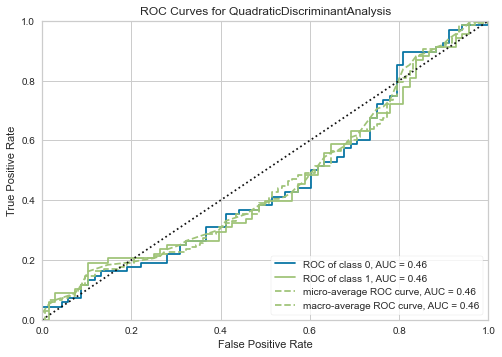

In [78]:
plot_model(TUNED_MODEL, plot = 'auc')

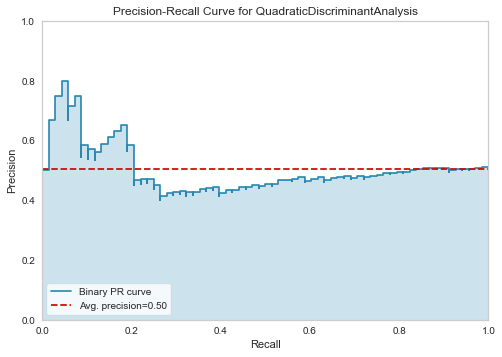

In [79]:
plot_model(TUNED_MODEL, plot = 'pr')

In [80]:
plot_model(TUNED_MODEL, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

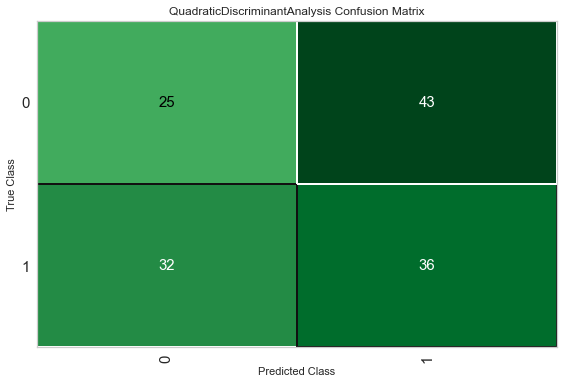

In [81]:
plot_model(TUNED_MODEL, plot = 'confusion_matrix')

In [82]:
predict_model(TUNED_MODEL);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.4485,0.4554,0.5294,0.4557,0.4898,-0.1029,-0.1043


In [83]:
FINAL_MODEL = finalize_model(TUNED_MODEL)

In [84]:
print(FINAL_MODEL)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)


In [85]:
predict_model(FINAL_MODEL);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.5956,0.6449,0.6324,0.5890,0.6099,0.1912,0.1917


In [86]:
unseen_predictions = predict_model(FINAL_MODEL, data=data_unseen)
unseen_predictions.head()

,Current_Market,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P,Label,Score
0,0,88.0,0,18.0,1,70.0,0,1,0.6068
1,0,40.0,1,39.0,0,70.0,0,0,0.5075
2,1,27.0,1,42.0,1,79.0,1,0,0.5418
3,1,64.0,1,82.0,0,53.0,0,1,0.5830
4,1,17.0,1,36.0,1,60.0,0,1,0.5409


In [87]:
save_model(FINAL_MODEL,'Final Model 04Nov2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Current_Market',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                 ('dummy', Dummify(target='Current_Market')),
                 ('fix_perfect', Remove_100(target='Current_Market')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthroug

In [88]:
SAVED_FINAL_MODEL = load_model('Final Model 04Nov2021')

Transformation Pipeline and Model Successfully Loaded


In [89]:
new_prediction = predict_model(SAVED_FINAL_MODEL, data=data_unseen)

In [90]:
new_prediction.head(20)

,Current_Market,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P,Label,Score
0,0,88.0,0,18.0,1,70.0,0,1,0.6068
1,0,40.0,1,39.0,0,70.0,0,0,0.5075
2,1,27.0,1,42.0,1,79.0,1,0,0.5418
3,1,64.0,1,82.0,0,53.0,0,1,0.5830
4,1,17.0,1,36.0,1,60.0,0,1,0.5409
5,0,58.0,0,18.0,0,66.0,0,0,0.5225
6,0,85.0,1,75.0,0,80.0,1,1,0.5941
7,1,87.0,1,82.0,0,73.0,0,1,0.5512
8,1,78.0,1,59.0,0,75.0,1,1,0.5337
9,1,37.0,1,13.0,1,39.0,0,1,0.7193


In [91]:
final = new_prediction[['Current_Market','Label']]

In [63]:
final.head(30)

,Current_Market,Label
0,0,0
1,0,1
2,0,1
3,1,0
4,1,1
5,1,1
6,0,1
7,1,1
8,0,0
9,0,1
